In [99]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn
plt.style.use('seaborn-dark')

### Lendo os dados

In [100]:
files = glob.glob("*.csv")

In [101]:
frames = list()
col = ["numero_boletim", "data hora_boletim", "data_inclusao", "tipo_acidente", "desc_tipo_acidente", "cod_tempo", "desc_tempo", "cod_pavimento", "pavimento","cod_regional", "desc_regional", "origem_boletim", "local_sinalizado", "velocidade_permitida", "coordenada_x", "coordenada_y", "hora_informada", "indicador_fatalidade", "valor_ups", "descricao_ups", "data_alteracao_smsa", "valor_ups_antiga", "descricao_ups_antiga"]
for file in files:
        frames.append(pd.read_csv(file, encoding = "ISO 8859-1",sep=';',
                      names=col, usecols=col,index_col='data hora_boletim',
                      parse_dates=['data hora_boletim','data_inclusao',"hora_informada"],skiprows=1))
df = pd.concat(frames)   

In [102]:
df.head()

,numero_boletim,data_inclusao,tipo_acidente,desc_tipo_acidente,cod_tempo,desc_tempo,cod_pavimento,pavimento,cod_regional,desc_regional,...,velocidade_permitida,coordenada_x,coordenada_y,hora_informada,indicador_fatalidade,valor_ups,descricao_ups,data_alteracao_smsa,valor_ups_antiga,descricao_ups_antiga
data hora_boletim,,,,,,,,,,,,,,,,,,,,,
2011-12-31 21:35:00,9,2012-02-14,H06002,ATROPELAMENTO DE PESSOA SEM VITIMA FATAL ...,0,NAO INFORMADO,0,NAO INFORMADO,26,VENDA NOVA,...,0,60643717.0,81070137.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO
2011-12-31 22:16:00,161,2012-02-14,H08002,CHOQUE MECANICO COM VITIMA ...,1,BOM,1,ASFALTO,18,BARREIRO,...,0,0.0,0.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO
2011-01-01 00:50:00,198,2011-10-02,H01002,ABALROAMENTO COM VITIMA ...,1,BOM,1,ASFALTO,19,CENTRO-SUL,...,0,60987128.0,79731533.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO
2011-01-01 00:20:00,223,2011-10-02,H04000,QUEDA DE PESSOA DE VEICULO ...,1,BOM,1,ASFALTO,20,LESTE,...,0,61411252.0,79710700.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO
2011-12-31 23:39:00,246,2012-09-01,H02002,CAPOTAMENTO/TOMBAMENTO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,20,LESTE,...,0,61403481.0,79729531.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO


### Análise descritiva

In [103]:
#df.desc_tipo_acidente.replace({"ATROPELAMENTO DE AMAL COM VITIMA                ":"ATROPELAMENTO DE ANIMAL COM VITIMA                ",
#                              'CHOQUE MECACO COM VITIMA                        ':'CHOQUE MECANICO COM VITIMA                        '},inplace=True)
df.describe(include=['O'])

,tipo_acidente,desc_tipo_acidente,desc_tempo,pavimento,desc_regional,origem_boletim,local_sinalizado,hora_informada,indicador_fatalidade,descricao_ups,data_alteracao_smsa,descricao_ups_antiga
count,73964,73964,73964,73964,73964,73964,73964,73964,73964,73964,73964,73964
unique,11,11,5,4,10,5,3,2,2,2,1,1
top,H01002,ABALROAMENTO COM VITIMA ...,NAO INFORMADO,NAO INFORMADO,CENTRO-SUL,PMMG,NÃO INFORMADO,SIM,NÃO,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,NÃO INFORMADO
freq,30037,30037,58244,56930,15013,45703,72070,73918,73148,73111,73964,73964


In [104]:
df = df.applymap(lambda x: x.strip() if type(x) is str else x)
#for col in df.columns:
#    if df[col].dtypes == 'float64':
#        continue
#    df[col] = df[col].astype(str).str.strip()

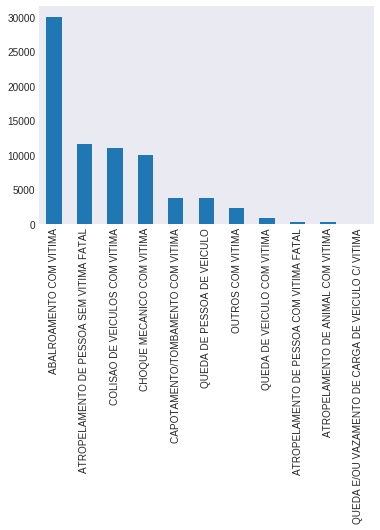

In [105]:
%matplotlib inline 
field = "desc_tipo_acidente"
df[field].dropna().value_counts().plot(kind='bar')
plt.show()

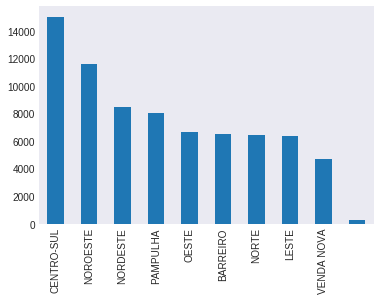

In [106]:
%matplotlib inline 
field = "desc_regional"
df[field].dropna().value_counts().plot(kind='bar')
plt.show()

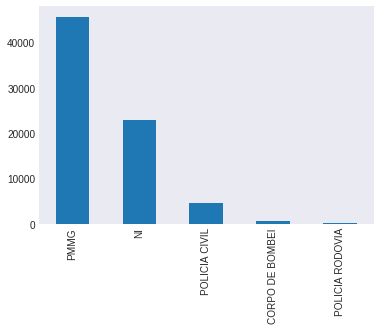

In [107]:
%matplotlib inline 
field = "origem_boletim"
df[field].dropna().value_counts().plot(kind='bar')
plt.show()

In [108]:
df["desc_tipo_acidente"].unique()

array(['ATROPELAMENTO DE PESSOA SEM VITIMA FATAL',
       'CHOQUE MECANICO COM VITIMA', 'ABALROAMENTO COM VITIMA',
       'QUEDA DE PESSOA DE VEICULO', 'CAPOTAMENTO/TOMBAMENTO COM VITIMA',
       'OUTROS COM VITIMA', 'COLISAO DE VEICULOS COM VITIMA',
       'QUEDA DE VEICULO COM VITIMA',
       'ATROPELAMENTO DE PESSOA COM VITIMA FATAL',
       'ATROPELAMENTO DE ANIMAL COM VITIMA',
       'QUEDA E/OU VAZAMENTO DE CARGA DE VEICULO C/ VITIMA'], dtype=object)

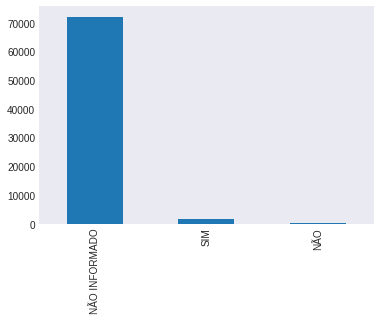

In [109]:
%matplotlib inline 
field = "local_sinalizado"
df[field].dropna().value_counts().plot(kind='bar')
plt.show()

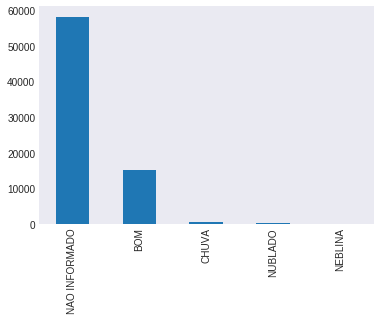

In [110]:
%matplotlib inline 
field = "desc_tempo"
df[field].dropna().value_counts().plot(kind='bar')
plt.show()

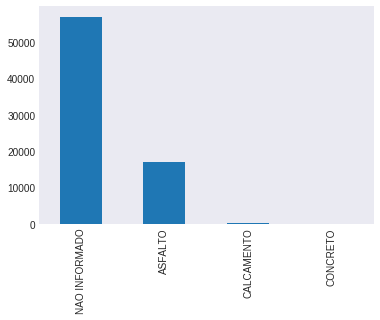

In [111]:
%matplotlib inline 
field = "pavimento"
df[field].dropna().value_counts().plot(kind='bar')
plt.show()

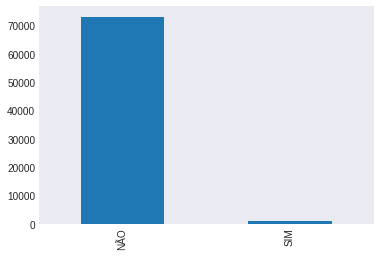

In [112]:
%matplotlib inline 
field = "indicador_fatalidade"
df[field].dropna().value_counts().plot(kind='bar')
plt.show()

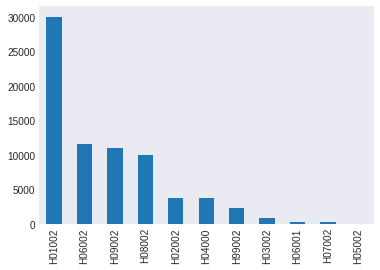

In [113]:
%matplotlib inline 
field = "tipo_acidente"
df[field].dropna().value_counts().plot(kind='bar')
plt.show()

In [116]:
df.drop(["pavimento","desc_tempo","local_sinalizado","descricao_ups_antiga","data_alteracao_smsa"],1,inplace=True)



In [120]:
df.to_csv("boletim_ocorencia.csv")